This notebook contains the code for image placement. The tasks implemented below are:

- placing the ROI into the target image
- Determine the left shoulder and bottom of feet for the target person
- Choose fixed value for width between shoulders
- Make sure feet are aligned when pasting source into target


//input = mask, target image

//output points for placement of source person into target

In [ ]:
# bottom of right foot of target
# bottom of left foot of source (from mask)
# location of rightmost pixel of target 
# define distance (pixel) between people
# scaling of source person
# define center for seamless clone

Links

- https://stackoverflow.com/questions/61403755/get-the-real-bounding-box-of-a-rectangle-shaped-mask

- https://github.com/nikhilroxtomar/Semantic-Segmentation-Mask-to-Bounding-Box/blob/main/mask_to_bbox.py

- https://www.geeksforgeeks.org/python-opencv-cv2-rectangle-method/

- https://stackoverflow.com/questions/60869306/how-to-simple-crop-the-bounding-box-in-python-opencv

## Bounding Box Method 1: assuming people are roughly rectangular

In [ ]:
import imutils
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

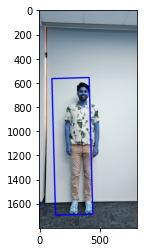

In [ ]:
img = cv2.imread("source.jpg")
numpymask = cv2.imread('mask_test_2.bmp', cv2.IMREAD_GRAYSCALE) 
#numpymask = np.uint8(numpymask > 0)
contours,_ = cv2.findContours(numpymask.copy(), 1, 1) # not copying here will throw an error
rect = cv2.minAreaRect(contours[0]) # basically you can feed this rect into your classifier
(x,y),(w,h), a = rect # a - angle

box = cv2.boxPoints(rect)
box = np.int0(box) #turn into ints
rect2 = cv2.drawContours(img.copy(),[box],0,(0,0,255),10)

plt.imshow(rect2)
plt.show()

In [ ]:
print(numpymask[numpymask>0])

[13 54 62 ...  2  2  1]


## Bounding Box Method 2: defining the bounding box as the outermost edges of the contours of a person

212
596
499
1685


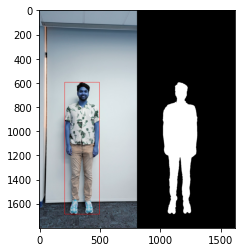

In [ ]:
import os
import numpy as np
import cv2
from glob import glob
from tqdm import tqdm
from skimage.measure import label, regionprops, find_contours
import matplotlib.pyplot as plt

""" Creating a directory """
def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

""" Convert a mask to border image """
def mask_to_border(mask):
    h, w = mask.shape
    border = np.zeros((h, w))

    contours = find_contours(mask, 128)
    for contour in contours:
        for c in contour:
            x = int(c[0])
            y = int(c[1])
            border[x][y] = 255

    return border

""" Mask to bounding boxes """
def mask_to_bbox(mask):
    bboxes = []

    mask = mask_to_border(mask)
    lbl = label(mask)
    props = regionprops(lbl)
    for prop in props:
        x1 = prop.bbox[1]
        y1 = prop.bbox[0]

        x2 = prop.bbox[3]
        y2 = prop.bbox[2]

        bboxes.append([x1, y1, x2, y2])

    return bboxes

def parse_mask(mask):
    mask = np.expand_dims(mask, axis=-1)
    mask = np.concatenate([mask, mask, mask], axis=-1)
    return mask

if __name__ == "__main__":
    """ Load the dataset """
    images = "source.jpg"#sorted(glob(os.path.join("data", "image", "*")))
    masks = "perfect_mask.bmp" #"sorted(glob(os.path.join("data", "mask", "*")))"

    """ Create folder to save images """
    create_dir("results")

    """ Loop over the dataset """
    #for x, y in tqdm(zip(images, masks), total=len(images)):

    #name = x.split("/")[-1].split(".")[0]

    """ Read image and mask """
    x = cv2.imread(images, cv2.IMREAD_COLOR)
    y = cv2.imread(masks, cv2.IMREAD_GRAYSCALE)

    """ Detecting bounding boxes """
    bboxes = mask_to_bbox(y)

    """ marking bounding box on image """
    bbox = bboxes[0]
    x = cv2.rectangle(x, (bbox[0], bbox[1]), (bbox[2], bbox[3]), (255, 0, 0), 2)
    print(bbox[0])
    print(bbox[1])
    print(bbox[2])
    print(bbox[3])
    #plt.imshow("Image", x)
    #plt.show()
    """ Saving the image """
    cat_image = np.concatenate([x, parse_mask(y)], axis=1)
    #cv2.imwrite(f"results/1.png", cat_image)
    plt.imshow(cat_image)

## Extracting pixel coordinate of bottom right part of the target person's foot

In [ ]:
top_left = (bbox[0], bbox[1])
bottom_right = (bbox[2], bbox[3])

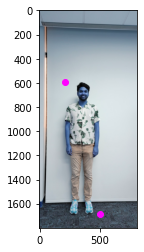

In [ ]:
plt.imshow(img)
plt.scatter(x = [bbox[0], bbox[2]], y = [bbox[1], bbox[3]], color = 'magenta')

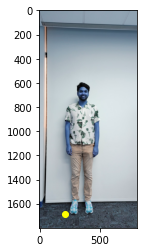

In [ ]:
bottom_left = (bbox[0], bbox[3]) #This is the value of interest in the target image!!!
plt.imshow(img)
plt.scatter(x = bbox[0], y = bbox[3], color='yellow')

## Proof of Concept: Using Bounding Boxes to get the Center of the Source image in terms of the Target and Cropping the Source Image & Mask

### Bounding Box around Source Image

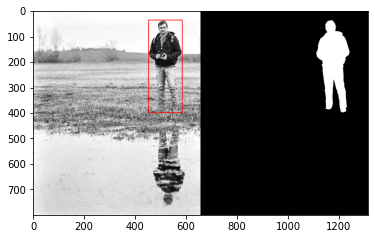

In [ ]:
""" Creating a directory """
def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

""" Convert a mask to border image """
def mask_to_border(mask):
    h, w = mask.shape
    border = np.zeros((h, w))

    contours = find_contours(mask, 128)
    for contour in contours:
        for c in contour:
            x = int(c[0])
            y = int(c[1])
            border[x][y] = 255

    return border

""" Mask to bounding boxes """
def mask_to_bbox(mask):
    bboxes = []

    mask = mask_to_border(mask)
    lbl = label(mask)
    props = regionprops(lbl)
    for prop in props:
        x1 = prop.bbox[1]
        y1 = prop.bbox[0]

        x2 = prop.bbox[3]
        y2 = prop.bbox[2]

        bboxes.append([x1, y1, x2, y2])

    return bboxes

def parse_mask(mask):
    mask = np.expand_dims(mask, axis=-1)
    mask = np.concatenate([mask, mask, mask], axis=-1)
    return mask

if __name__ == "__main__":
    """ Load the dataset """
    images = "man.png"#sorted(glob(os.path.join("data", "image", "*")))
    masks = "man_mask.png" #"sorted(glob(os.path.join("data", "mask", "*")))"

    """ Create folder to save images """
    create_dir("results")

    """ Loop over the dataset """
    #for x, y in tqdm(zip(images, masks), total=len(images)):

    #name = x.split("/")[-1].split(".")[0]

    """ Read image and mask """
    x = cv2.imread(images, cv2.IMREAD_COLOR)
    y = cv2.imread(masks, cv2.IMREAD_GRAYSCALE)

    """ Detecting bounding boxes """
    bboxes = mask_to_bbox(y)

    """ marking bounding box on image """
    bbox = bboxes[0]
    x = cv2.rectangle(x, (bbox[0], bbox[1]), (bbox[2], bbox[3]), (255, 0, 0), 2)
    #plt.imshow("Image", x)
    #plt.show()
    """ Saving the image """
    cat_image = np.concatenate([x, parse_mask(y)], axis=1)
    #cv2.imwrite(f"results/1.png", cat_image)
    plt.imshow(cat_image)

In [ ]:
height = bbox[1]-bbox[3]
width = bbox[2]-bbox[0]
midHeight = height // 2
midWidth = width // 2

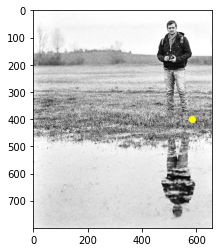

In [ ]:
bottom_right = (bbox[2], bbox[3])
plt.imshow(cv2.imread(images, cv2.IMREAD_COLOR))
plt.scatter(x = bbox[2], y=bbox[3], color = 'yellow')

In [ ]:
print(bottom_right)

(585, 398)


### Bounding Box around Target

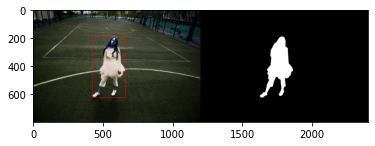

In [ ]:
""" Creating a directory """
def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

""" Convert a mask to border image """
def mask_to_border(mask):
    h, w = mask.shape
    border = np.zeros((h, w))

    contours = find_contours(mask, 128)
    for contour in contours:
        for c in contour:
            x = int(c[0])
            y = int(c[1])
            border[x][y] = 255

    return border

""" Mask to bounding boxes """
def mask_to_bbox(mask):
    bboxes = []

    mask = mask_to_border(mask)
    lbl = label(mask)
    props = regionprops(lbl)
    for prop in props:
        x1 = prop.bbox[1]
        y1 = prop.bbox[0]

        x2 = prop.bbox[3]
        y2 = prop.bbox[2]

        bboxes.append([x1, y1, x2, y2])

    return bboxes

def parse_mask(mask):
    mask = np.expand_dims(mask, axis=-1)
    mask = np.concatenate([mask, mask, mask], axis=-1)
    return mask

if __name__ == "__main__":
    """ Load the dataset """
    images = "girl.png"#sorted(glob(os.path.join("data", "image", "*")))
    masks = "girl_mask.png" #"sorted(glob(os.path.join("data", "mask", "*")))"

    """ Create folder to save images """
    create_dir("results")

    """ Loop over the dataset """
    #for x, y in tqdm(zip(images, masks), total=len(images)):

    #name = x.split("/")[-1].split(".")[0]

    """ Read image and mask """
    x = cv2.imread(images, cv2.IMREAD_COLOR)
    y = cv2.imread(masks, cv2.IMREAD_GRAYSCALE)

    """ Detecting bounding boxes """
    bboxes = mask_to_bbox(y)

    """ marking bounding box on image """
    bbox = bboxes[0]
    x = cv2.rectangle(x, (bbox[0], bbox[1]), (bbox[2], bbox[3]), (255, 0, 0), 2)
    #plt.imshow("Image", x)
    #plt.show()
    """ Saving the image """
    cat_image = np.concatenate([x, parse_mask(y)], axis=1)
    #cv2.imwrite(f"results/1.png", cat_image)
    plt.imshow(cat_image)

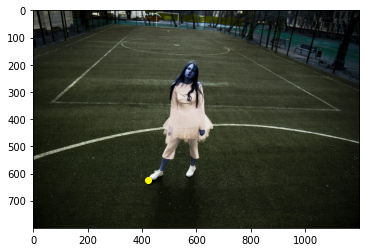

In [ ]:
bottom_left = (bbox[0], bbox[3]) #This is the value of interest in the target image!!!
plt.imshow(cv2.imread(images, cv2.IMREAD_COLOR))
plt.scatter(x = bbox[0], y = bbox[3], color='yellow')

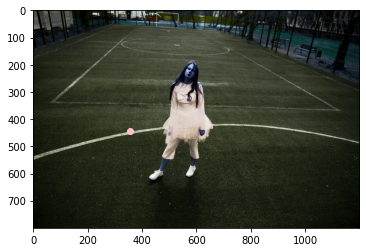

In [ ]:
padding = 2
center = ((bottom_left[0] - midWidth - padding), (bottom_left[1] + midHeight))
plt.imshow(cv2.imread(images, cv2.IMREAD_COLOR))
plt.scatter(x = center[0], y = center[1], color='pink')

In [ ]:
print(center)

(356, 443)


### Cropping an Image and its Mask using the Bounding Box

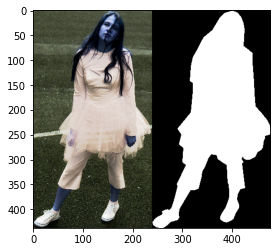

In [ ]:
img = cv2.imread('girl.png', cv2.IMREAD_COLOR)
mask = cv2.imread('girl_mask.png', cv2.IMREAD_GRAYSCALE)
X, Y, W, H = bbox[0], bbox[1], bbox[2]-bbox[0], bbox[3]-bbox[1]
cropped_image = img[Y:Y+H, X:X+W]
cropped_mask = mask[Y:Y+H, X:X+W]
#print([X,Y,W,H])
#plt.imshow(cropped_image)
#plt.scatter(x=[bbox[0], bbox[2]], y=[bbox[1], bbox[3]])
cat_image = np.concatenate([cropped_image, parse_mask(cropped_mask)], axis=1)
plt.imshow(cat_image)
#plt.scatter(x=[bbox[2]], y=[bbox[3]])
#print(bbox[3]-bbox[1])